# Stochastic Gradient Descent #

In [4]:
import matplotlib.pyplot as plt
from learntools.deep_learning_intro.dltools import animate_sgd
plt.style.use('seaborn-v0_8-whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex3 import *

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('../input/dl-course-data/fuel.csv')

X = fuel.copy()

y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [7]:
fuel.head()

pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

# 1) Add Loss and Optimizer

In [10]:
model.compile(
    optimizer='adam',
    loss='mae'
)

q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

# 2) Train Model

In [12]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

q_2.check()

Epoch 1/200
9/9 [==============================] - 1s 4ms/step - loss: 2.9480
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 1.0748
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.5762
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3572
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2495
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1815
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1399
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1214
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1096
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0981
Epoch 11/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0861
Epoch 12/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 13/200
9/9 [==============================] - 0s 3ms/st

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

The last step is to look at the loss curves and evaluate the training. Run the cell below to get a plot of the training loss.

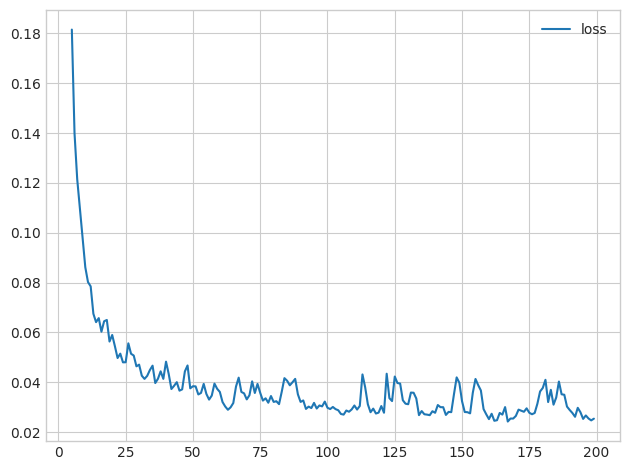

In [13]:
import pandas as pd

history_df = pd.DataFrame(history.history)

history_df.loc[5:, ['loss']].plot();

# 3) Evaluate Training

In [14]:
learning_rate = 0.05
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,

    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

# 4) Learning Rate and Batch Size

In [15]:
q_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 


You probably saw that smaller batch sizes gave noisier weight updates and loss curves. This is because each batch is a small *sample* of data and smaller samples tend to give noisier estimates. Smaller batches can have an "averaging" effect though which can be beneficial.

Smaller learning rates make the updates smaller and the training takes longer to converge. Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely. (Try setting the learning rate to a large value like 0.99 to see this.)
